In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler
from sklearn import datasets  
from sklearn.decomposition import PCA 
import seaborn as sns  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import array
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import AdaBoostClassifier

In [3]:
DF=pd.read_csv('/content/drive/MyDrive/DM P1/Weed-4class-36/Weed-4class-36-labels.csv')
DF

,Filename,Label,Species
0,20161207-112417-0.jpg,8,Negative
1,20161207-112431-0.jpg,8,Negative
2,20161207-112802-0.jpg,8,Negative
3,20161207-112812-0.jpg,8,Negative
4,20170128-101909-0.jpg,8,Negative
...,...,...,...
13277,20171025-172145-3.jpg,3,Parthenium
13278,20171025-172200-3.jpg,3,Parthenium
13279,20171025-172226-3.jpg,3,Parthenium
13280,20171025-172236-3.jpg,3,Parthenium


In [4]:
DF_weed=DF.loc[DF['Species']=='Parthenium']
DF_ngt=DF.loc[DF['Species']=='Negative']

weed_imgs=list(DF_weed['Filename'])
ngt_imgs=list(DF_ngt['Filename'])

In [5]:
ngt_hist=[]
wd_hist=[]

for img in ngt_imgs[0:9098]:
  img_gray = cv2.imread('/content/drive/MyDrive/DM P1/Negatives/'+img,0)
  hist, bins = np.histogram(img_gray.ravel(), 256, [0, 256])
  ngt_hist.append(hist)

for img in ngt_imgs[9099:]:
  img_gray = cv2.imread('/content/drive/MyDrive/DM P1/Negatives/'+img,0)
  hist, bins = np.histogram(img_gray.ravel(), 256, [0, 256])
  ngt_hist.append(hist)

for img in weed_imgs:
  img_gray = cv2.imread('/content/drive/MyDrive/DM P1/Weed-4class-36/'+img,0)
  hist, bins = np.histogram(img_gray.ravel(), 256, [0, 256])
  wd_hist.append(hist)

In [6]:
X_ngt=ngt_hist
X_wd=wd_hist

y_ngt=list(DF_ngt['Label'])
y_ngt=y_ngt[0:9105]
y_wd=list(DF_weed['Label'])

(Model Selection) Split the dataset into a training set and a test set. For each class (weed and non-weed),
perform a training/test split of 80/20. Perform 5-fold cross-validation on the training set for k-Nearest
Neighbor Classifiers such that 𝑘 = 1, 3, 5, 7 on the dataset. (2 points)

In [7]:
X_ngt_train, X_ngt_test, y_ngt_train, y_ngt_test = train_test_split(X_ngt, y_ngt, stratify=y_ngt, test_size=0.2, random_state=42)
X_wd_train, X_wd_test, y_wd_train, y_wd_test = train_test_split(X_wd, y_wd, stratify=y_wd, test_size=0.2, random_state=42)

In [8]:
X_train=X_ngt_train+X_wd_train
y_train=y_ngt_train+y_wd_train

X_test=X_ngt_test+X_wd_test
y_test=y_ngt_test+y_wd_test

X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [9]:
cv = KFold(n_splits=5, shuffle=True)
K_classifiers = [1, 3, 5, 7]
mean_val_error=[]

for K_classifier in K_classifiers:
  val_accuracy=[]
  for train_idx, val_idx in cv.split(X_train):

        X_cv_train, X_cv_val = X_train[train_idx], X_train[val_idx]
        y_cv_train, y_cv_val = y_train[train_idx], y_train[val_idx]

        knn = KNeighborsClassifier(n_neighbors=K_classifier)

        knn.fit(X_cv_train, y_cv_train)

        y_pred = knn.predict(X_cv_val)

        val_accuracy.append(accuracy_score(y_cv_val, y_pred))

  mean_val_error.append((1-(np.mean(val_accuracy)))*100)

print('Mean Validation error: '+str(mean_val_error))

Mean Validation error: [8.579188277316996, 6.678189808150736, 6.431215299198034, 6.209137782652063]


https://scikit-learn.org/stable/modules/cross_validation.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

• Plot a graph (x-axis: k; y-axis: mean validation error (%)). Which 𝑘 has the lowest mean error?
(1 points)

In [10]:
mean_val_error

[8.579188277316996, 6.678189808150736, 6.431215299198034, 6.209137782652063]

K=7 has the lowest mean validation error

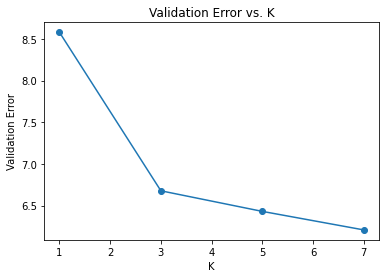

In [11]:
plt.plot(K_classifiers, mean_val_error, marker='o')

plt.xlabel('K')
plt.ylabel('Validation Error')
plt.title('Validation Error vs. K')

plt.show()

• Use the 𝑘 value with the lowest mean error for your k-Nearest Neighbor classifier. What is the test
error? (1 point)

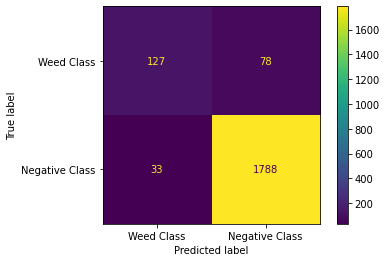

Test error: 5.4787759131293186
Classifcation Report: 
              precision    recall  f1-score   support

           3       0.79      0.62      0.70       205
           8       0.96      0.98      0.97      1821

    accuracy                           0.95      2026
   macro avg       0.88      0.80      0.83      2026
weighted avg       0.94      0.95      0.94      2026



In [12]:
cv = KFold(n_splits=5, shuffle=True)

for train_idx, val_idx in cv.split(X_train):

        X_cv_train, X_cv_val = X_train[train_idx], X_train[val_idx]
        y_cv_train, y_cv_val = y_train[train_idx], y_train[val_idx]

        knn = KNeighborsClassifier(n_neighbors = 7)

        knn.fit(X_cv_train, y_cv_train)

y_test_pred=knn.predict(X_test)

Label_names = []
for labl in knn.classes_:
  if labl==3:
    Label_names.append('Weed Class')
  else:
    Label_names.append('Negative Class')

cm = confusion_matrix(y_test, y_test_pred, labels=knn.classes_)
test_accuracy=accuracy_score(y_test,y_test_pred)
test_error=(1-test_accuracy)*100
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Label_names)
disp.plot()

plt.show()
print('Test error: '+str(test_error))
print('Classifcation Report: ')
print(classification_report(y_test,y_test_pred))

Test error is 5.48%

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier


3. (Performance Comparison) Use images from all four weed classes (ignore negative class). Convert the
images to grayscale pixel intensity histograms.

In [13]:
DF_part=DF.loc[DF['Species']=='Parthenium']
DF_lant=DF.loc[DF['Species']=='Lantana']
DF_snake=DF.loc[DF['Species']=='Snake weed']
DF_siam=DF.loc[DF['Species']=='Siam weed']

part_imgs=list(DF_part['Filename'])
lant_imgs=list(DF_lant['Filename'])
snake_imgs=list(DF_snake['Filename'])
siam_imgs=list(DF_siam['Filename'])

In [14]:
part_hist=[]
lant_hist=[]
snake_hist=[]
siam_hist=[]

for img in part_imgs:
  img_gray = cv2.imread('/content/drive/MyDrive/DM P1/Weed-4class-36/'+img,0)
  hist, bins = np.histogram(img_gray.ravel(), 256, [0, 256])
  part_hist.append(hist)

for img in lant_imgs:
  img_gray = cv2.imread('/content/drive/MyDrive/DM P1/Weed-4class-36/'+img,0)
  hist, bins = np.histogram(img_gray.ravel(), 256, [0, 256])
  lant_hist.append(hist)

for img in snake_imgs:
  img_gray = cv2.imread('/content/drive/MyDrive/DM P1/Weed-4class-36/'+img,0)
  hist, bins = np.histogram(img_gray.ravel(), 256, [0, 256])
  snake_hist.append(hist)

for img in siam_imgs:
  img_gray = cv2.imread('/content/drive/MyDrive/DM P1/Weed-4class-36/'+img,0)
  hist, bins = np.histogram(img_gray.ravel(), 256, [0, 256])
  siam_hist.append(hist)

In [15]:
X_part=part_hist
X_lant=lant_hist
X_snake=snake_hist
X_siam=siam_hist

y_part=list(DF_part['Label'])
y_lant=list(DF_lant['Label'])
y_snake=list(DF_snake['Label'])
y_siam=list(DF_siam['Label'])

Split dataset into a training set and a test set. For each
class, perform a training/test split of 80/20.

In [16]:
X_part_train, X_part_test, y_part_train, y_part_test = train_test_split(X_part, y_part, stratify=y_part, test_size=0.2, random_state=42)
X_lant_train, X_lant_test, y_lant_train, y_lant_test = train_test_split(X_lant, y_lant, stratify=y_lant, test_size=0.2, random_state=42)
X_snake_train, X_snake_test, y_snake_train, y_snake_test = train_test_split(X_snake, y_snake, stratify=y_snake, test_size=0.2, random_state=42)
X_siam_train, X_siam_test, y_siam_train, y_siam_test = train_test_split(X_siam, y_siam, stratify=y_siam, test_size=0.2, random_state=42)

In [17]:
X_train=X_part_train+X_lant_train+X_snake_train+X_siam_train
y_train=y_part_train+y_lant_train+y_snake_train+y_siam_train

X_test=X_part_test+X_lant_test+X_snake_test+X_siam_test
y_test=y_part_test+y_lant_test+y_snake_test+y_siam_test

X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

Perform 5-fold cross-validation on the 4-class classification
using the three classification methods (available on canvas) assigned to you. Plot the confusion matrices
for the three approaches (clearly label the classes) using the test set (See Figure 1). (If you use code
from any website, please do proper referencing. You will get 0 point for this assignment without proper
referencing) (3 points)


Gradient Boosted Decision Tree


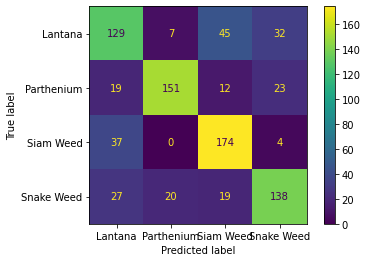

Validation accuracies: [71.55688622754491, 72.30538922155688, 69.16167664670658, 70.05988023952095, 65.6671664167916]
Mean validation accuracy: 69.75019975042417
Test Accuracy: 70.72879330943847
Classifcation Report: 
              precision    recall  f1-score   support

           1       0.61      0.61      0.61       213
           3       0.85      0.74      0.79       205
           6       0.70      0.81      0.75       215
           7       0.70      0.68      0.69       204

    accuracy                           0.71       837
   macro avg       0.71      0.71      0.71       837
weighted avg       0.71      0.71      0.71       837



In [18]:
cv = KFold(n_splits=5, shuffle=True)
val_accuracy=[]

for train_idx, val_idx in cv.split(X_train):

        X_cv_train, X_cv_val = X_train[train_idx], X_train[val_idx]
        y_cv_train, y_cv_val = y_train[train_idx], y_train[val_idx]

        gbd=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=4, max_depth=4 )

        gbd.fit(X_cv_train, y_cv_train)

        y_pred = gbd.predict(X_cv_val)

        val_accuracy.append((accuracy_score(y_cv_val, y_pred))*100)

mean_val_accuracy=np.mean(val_accuracy)
y_test_pred=gbd.predict(X_test)

Label_names = []
for labl in gbd.classes_:
  if labl==1:
    Label_names.append('Lantana')
  if labl==3:
    Label_names.append('Parthenium')
  if labl==6:
    Label_names.append('Siam Weed')
  if labl==7:
    Label_names.append('Snake Weed')


cm = confusion_matrix(y_test, y_test_pred)
test_accuracy=(accuracy_score(y_test,y_test_pred))*100
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Label_names)
disp.plot()

plt.show()
print("Validation accuracies: " + str(val_accuracy))
print("Mean validation accuracy: " + str(mean_val_accuracy))
print("Test Accuracy: "+ str(test_accuracy))
print('Classifcation Report: ')
print(classification_report(y_test,y_test_pred))

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

https://machinelearningmastery.com/k-fold-cross-validation/

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

https://www.machinelearningplus.com/machine-learning/an-introduction-to-gradient-boosting-decision-trees/





Perceptron

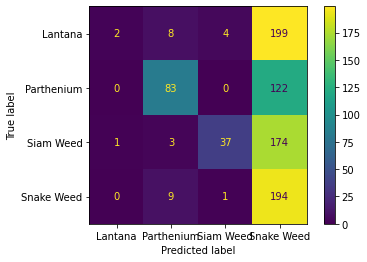

Validation accuracies: [54.041916167664674, 55.23952095808383, 55.23952095808383, 41.16766467065868, 33.43328335832084]
Mean validation accuracy: 47.824381222562366
Test Accuracy: 0.37753882915173237
Classifcation Report: 
              precision    recall  f1-score   support

           1       0.67      0.01      0.02       213
           3       0.81      0.40      0.54       205
           6       0.88      0.17      0.29       215
           7       0.28      0.95      0.43       204

    accuracy                           0.38       837
   macro avg       0.66      0.38      0.32       837
weighted avg       0.66      0.38      0.32       837



In [19]:
cv = KFold(n_splits=5, shuffle=True)
val_accuracy=[]

for train_idx, val_idx in cv.split(X_train):

        X_cv_train, X_cv_val = X_train[train_idx], X_train[val_idx]
        y_cv_train, y_cv_val = y_train[train_idx], y_train[val_idx]

        ppn = Perceptron(tol=1e-3, random_state=0)

        ppn.fit(X_cv_train, y_cv_train)

        y_pred = ppn.predict(X_cv_val)

        val_accuracy.append((accuracy_score(y_cv_val, y_pred))*100)

mean_val_accuracy=np.mean(val_accuracy)
y_test_pred=ppn.predict(X_test)

Label_names = []
for labl in ppn.classes_:
  if labl==1:
    Label_names.append('Lantana')
  if labl==3:
    Label_names.append('Parthenium')
  if labl==6:
    Label_names.append('Siam Weed')
  if labl==7:
    Label_names.append('Snake Weed')

cm = confusion_matrix(y_test, y_test_pred)
test_accuracy=accuracy_score(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Label_names)
disp.plot()

plt.show()
print("Validation accuracies: " + str(val_accuracy))
print("Mean validation accuracy: " + str(mean_val_accuracy))
print("Test Accuracy: "+ str(test_accuracy))
print('Classifcation Report: ')
print(classification_report(y_test,y_test_pred))

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron

Adaboost Classifier

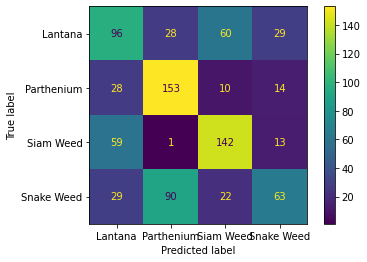

Validation accuracies: [55.53892215568862, 54.79041916167665, 56.137724550898206, 52.544910179640716, 53.67316341829086]
Mean validation accuracy: 54.53702789323901
Test Accuracy: 0.5424133811230586
Classifcation Report: 
              precision    recall  f1-score   support

           1       0.45      0.45      0.45       213
           3       0.56      0.75      0.64       205
           6       0.61      0.66      0.63       215
           7       0.53      0.31      0.39       204

    accuracy                           0.54       837
   macro avg       0.54      0.54      0.53       837
weighted avg       0.54      0.54      0.53       837



In [20]:
cv = KFold(n_splits=5, shuffle=True)
val_accuracy=[]

for train_idx, val_idx in cv.split(X_train):

        X_cv_train, X_cv_val = X_train[train_idx], X_train[val_idx]
        y_cv_train, y_cv_val = y_train[train_idx], y_train[val_idx]

        ada = AdaBoostClassifier(n_estimators=100)

        ada.fit(X_cv_train, y_cv_train)

        y_pred = ada.predict(X_cv_val)

        val_accuracy.append((accuracy_score(y_cv_val, y_pred))*100)

mean_val_accuracy=np.mean(val_accuracy)
y_test_pred=ada.predict(X_test)

Label_names = []
for labl in ada.classes_:
  if labl==1:
    Label_names.append('Lantana')
  if labl==3:
    Label_names.append('Parthenium')
  if labl==6:
    Label_names.append('Siam Weed')
  if labl==7:
    Label_names.append('Snake Weed')

cm = confusion_matrix(y_test, y_test_pred)
test_accuracy=accuracy_score(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Label_names)
disp.plot()

plt.show()
print("Validation accuracies: " + str(val_accuracy))
print("Mean validation accuracy: " + str(mean_val_accuracy))
print("Test Accuracy: "+ str(test_accuracy))
print('Classifcation Report: ')
print(classification_report(y_test,y_test_pred))

https://scikit-learn.org/stable/modules/ensemble.html#adaboost


• Based on the confusion matrices (on the validation set), which do you think is the best method?
Why? (1 point)

As the diagonal elements represents the number of instances classified correctly, 

Gradient boosted classifier had 592 correctly classified

perceptron classifier had 316 correctly classified

Ada boost classifier had 454 correctly classified

so, Gradient Boosted Classifier is the best model

• Based on the validation accuracies (from the 5-fold cross-validation) for the three methods. Which
is the best method? (0.5 point)

The validation accuracies for 

Gradient boosted Decision Tree classifier are [71.55688622754491, 72.30538922155688, 69.16167664670658, 70.05988023952095, 65.6671664167916] and mean is 69.75

perceptron classifier are [54.041916167664674, 55.23952095808383, 55.23952095808383, 41.16766467065868, 33.43328335832084] and mean is 47.82

Adaboost classifier are [55.53892215568862, 54.79041916167665, 56.137724550898206, 52.544910179640716, 53.67316341829086] and mean is 55.45

So Gradient Boosted Decision Tree Classifier is the best method



• Computer the test accuracies for the three methods. Which is the best method? (0.5 point)

The test accuracies for 

Gradient Boosted Decision Tree is 71%

perceptron classifier is 38%

Ada boost classifier is 54%

So Gradient Boosted Decision Tree is the best method

• Compute the F-measure for the three methods on the test set. Which is the best method? (1 point)

The F-measure on the test set for

Gradient boosted decision tree classifier is 61,79,75,69

perceptron classifier is 2,54,29,43

Ada boost classifier is 45,64,63,39

So Gradient Boosted Decision Tree is the best method